## Benford's Law - Peruvian Elections

In [229]:
import math

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Getting the data
https://github.com/rburhum/elecciones-peru-2021-ONPE/blob/main/data/result_resumen_por_mesa.csv

In [230]:
df = pd.read_csv('result_resumen_por_mesa.csv')
df = df[['ubigeo', 'votos_pl','votos_fp']]
df = df.groupby(by='ubigeo', as_index=False).sum()

In [233]:
df.head()

ubigeo  votos_pl  votos_fp
0   10101      7573      6066
1   10102       121        31
2   10103       368       259
3   10104       265       115
4   10105       166       191

In [234]:
sum(df['votos_fp'])

8542214

In [235]:
sum(df['votos_pl'])

8704049

Getting leading digit

In [237]:
def get_leading_digit(num):
  leading_digit = int(str(num)[0])
  return leading_digit

df['leading_digits_pl'] = df['votos_pl'].apply(get_leading_digit)
df['leading_digits_fp'] = df['votos_fp'].apply(get_leading_digit)

In [238]:
df.head()

ubigeo  votos_pl  votos_fp  leading_digits_pl  leading_digits_fp
0   10101      7573      6066                  7                  6
1   10102       121        31                  1                  3
2   10103       368       259                  3                  2
3   10104       265       115                  2                  1
4   10105       166       191                  1                  1

In [241]:
digit_df = df[['leading_digits_fp','leading_digits_pl']].copy()
digit_df['frecuency'] = 1

In [242]:
# Benford's Law percentages for leading digits 1-9
BENFORD = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

Frecuency of leading digits in Fuerza Popular

In [243]:
frec_fp = digit_df[['leading_digits_fp','frecuency']].groupby(by='leading_digits_fp', as_index=False).count()
frec_fp = frec_fp[frec_fp['leading_digits_fp']!=0]
frec_fp['actual_%'] = frec_fp['frecuency']/sum(frec_fp['frecuency'])
frec_fp['excepted_%'] = pd.Series(BENFORD)
frec_fp

leading_digits_fp  frecuency  actual_%  excepted_%
0                  1        570  0.304162        30.1
1                  2        328  0.175027        17.6
2                  3        247  0.131804        12.5
3                  4        186  0.099253         9.7
4                  5        157  0.083778         7.9
5                  6        107  0.057097         6.7
6                  7         99  0.052828         5.8
7                  8         80  0.042689         5.1
8                  9        100  0.053362         4.6

Frecuency in leading digits in Peru Libre

In [244]:
frec_pl = digit_df[['leading_digits_pl','frecuency']].groupby(by='leading_digits_pl', as_index=False).count()
frec_pl = frec_pl[frec_pl['leading_digits_pl']!=0]
frec_pl['actual_%'] = frec_pl['frecuency']/sum(frec_pl['frecuency'])
frec_pl['excepted_%'] = pd.Series(BENFORD)
frec_pl

leading_digits_pl  frecuency  actual_%  excepted_%
0                  1        566  0.302028        30.1
1                  2        351  0.187300        17.6
2                  3        240  0.128068        12.5
3                  4        187  0.099787         9.7
4                  5        142  0.075774         7.9
5                  6        119  0.063501         6.7
6                  7        110  0.058698         5.8
7                  8         81  0.043223         5.1
8                  9         78  0.041622         4.6

In [246]:
# https://towardsdatascience.com/frawd-detection-using-benfords-law-python-code-9db8db474cf8
def get_expected_counts(total_count):
    """Return list of expected Benford's Law counts for total sample count."""
    return [round(p * total_count / 100) for p in BENFORD]

def chi_square_test(data_count,expected_counts):
    """Return boolean on chi-square test (8 degrees of freedom & P-val=0.05)."""
    chi_square_stat = 0  # chi square test statistic
    for data, expected in zip(data_count, expected_counts):

        chi_square = math.pow(data - expected, 2)

        chi_square_stat += chi_square / expected

    print("\nChi-squared Test Statistic = {:.3f}".format(chi_square_stat))
    print("Critical value at a P-value of 0.05 is 15.51.")    
    return chi_square_stat < 15.51

## Benford's Law on Fuerza Popular

In [248]:
data_count = list(frec_fp['frecuency'])
expected_counts = get_expected_counts(sum(data_count))
data_count, expected_counts

([570, 328, 247, 186, 157, 107, 99, 80, 100],
 [564, 330, 234, 182, 148, 126, 109, 96, 86])

In [249]:
# Dots: Benford Distribution
plt.scatter(np.arange(1,10), np.array(expected_counts))
# Bars: Fuerza Popular leading digit Distribution
plt.bar(frec_fp['leading_digits_fp'], height=frec_fp['frecuency'], alpha=0.5)

<BarContainer object of 9 artists>

In [257]:
# Could we say distribution of leading digits in Fuerza Popular votes adjust to Benford's law? Yes!
chi_square_test(data_count, expected_counts)


Chi-squared Test Statistic = 5.364
Critical value at a P-value of 0.05 is 15.51.


True

## Benford's Law on Peru Libre

In [250]:
data_count = list(frec_pl['frecuency'])
expected_counts = get_expected_counts(sum(data_count))
data_count, expected_counts


Chi-squared Test Statistic = 5.364
Critical value at a P-value of 0.05 is 15.51.


True

<BarContainer object of 9 artists>

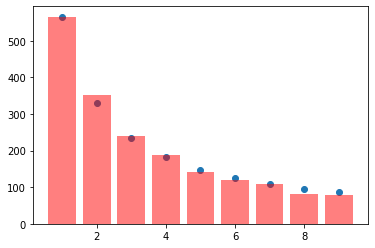

In [252]:
# Dots: Benford Distribution
plt.scatter(np.arange(1,10), np.array(expected_counts))
# Bars: Peru Libre leading digit Distribution
plt.bar(frec_pl['leading_digits_pl'], height=frec_pl['frecuency'], color=(1, 0, 0, 0.5))

In [253]:
# Could we say distribution of leading digits in Peru Libre votes adjust to Benford's law? Yes!
chi_square_test(data_count,expected_counts)


Chi-squared Test Statistic = 5.364
Critical value at a P-value of 0.05 is 15.51.


True